Exercise 1 (Plotting cell shapes, 10 points). Plot one of the cells by plotting the landmark points
and interpolating between subsequent landmark points.
Next, plot all the cells on top of each other. Can you see any dataset tendencies from this plot?
When plotting, make sure to make the axes equal to get the right dimensions. If you use matplotlyb.pyplot
this can be done by typing plt.axis('equal').

In [61]:
#Exercise 1
import numpy as np
import matplotlib.pyplot as plt
from plot import *
from pca import *
from kmc import *

# load data
diatoms = np.loadtxt("diatoms.txt")
col = np.shape(diatoms)[1] #number of columns
x_coord = diatoms[:, 0:col:2] #select alternate columns starting from 0
y_coord = diatoms[:, 1:col:2] #select alternate columns starting from 1
x_coord = np.concatenate((x_coord, x_coord[:, :1]), axis = 1) #add first x point to the end
y_coord = np.concatenate((y_coord, y_coord[:, :1]), axis = 1) #add first y point to the end
save = False

# plot 1
plt.plot(x_coord[0], y_coord[0], color = "gray")
plot_template(title = "Plot of first diatom", save = save)

<Figure size 432x288 with 0 Axes>

In [62]:
# plot all
for i in range(len(x_coord)):
    plt.plot(x_coord[i], y_coord[i], color = "gray", alpha = 0.1)
plot_template(title = "Plot of all diatoms", save = save)

<Figure size 432x288 with 0 Axes>

The diatoms become fatter and less elongated.

In [63]:
# Exercise 2
diatom_T = np.concatenate((x_coord.T, y_coord.T))
mean_diatom = np.mean(diatom_T, 1)
cov_matrix = np.cov(diatom_T)
diatom_eval, diatom_evec = np.linalg.eig(cov_matrix)

def plot_along_pc(p, n, save, data = diatom_T, eigenvalues = diatom_eval, eigenvectors = diatom_evec, mean_diatom = mean_diatom):
    """
    Takes in prinical component numner and plots n diatoms. 
    If you want to plot the first PC, use p = 1
    """
    pc_n = p - 1 #correct for python index
    principal_component = eigenvectors[:,pc_n] #select principal component
    eigenvalue = eigenvalues[pc_n] # select eigenvalue
    std = np.sqrt(eigenvalue)
    l = len(data)
    diatoms_along_pc = np.zeros((n, l)) # create empty matrix
    for i in range(n):
        diatoms_along_pc[i,:] = mean_diatom + (i-np.floor(n/2))*std*principal_component
        plt.plot(diatoms_along_pc[i, :int(l/2)], diatoms_along_pc[i, int(l/2):], label = i, color = (0, i/n, i/n))
    title = "Diatoms along Principal Component "+ str(p)
    plot_template(title = title, save = save)
    

In [64]:
plot_along_pc(1, 5, save)

<Figure size 432x288 with 0 Axes>

In [65]:
plot_along_pc(2, 5, save)

<Figure size 432x288 with 0 Axes>

In [66]:
plot_along_pc(3, 5, save)

<Figure size 432x288 with 0 Axes>

Principal component 1 captures the tendancy of the diatoms to becme fatter and less elongated.
Principal component 2 captures I DONT KNOW HOW TO DESCRIBE THIS
Principal component 3 captures I DONT KNOW HOW TO DESCRIBE THIS

# Exercise 3
1. Assume that you perform each of the following preprocessing steps prior to performing PCA. What is the effect on the PCA result? Is it a good idea?
    1. Centering  
    Yes, it is a good idea
    2. Standardization  
    It is a good idea if the dataset consists of different units of measurement. Actually I think it's always a good idea
    3. Whitening  
    Apparently this is very bad. Google this shit

In [67]:
# Exercise 3b
toy = np.loadtxt("pca_toydata.txt")
mds_plot(toy, "Principal Component Analysis of Toy dataset", save)

<Figure size 432x288 with 0 Axes>

In [68]:
toy2 = toy[:-2,:]
mds_plot(toy2, "Principal Component Analysis of modified Toy dataset", save)

<Figure size 432x288 with 0 Axes>

The dot in the center disappears

In [69]:
# Exercise 4
#load data
pesticide = np.loadtxt('IDSWeedCropTrain.csv', delimiter = ',')
pesticide_label = pesticide[:,-1]
pesticide = pesticide[:,:-1]
pesticide = center_data(pesticide)

#transform and separate
centroids = kmean(2, pesticide)
trasformed_centroids = mds(np.array(centroids), pesticide, 2)
print(f"Centroid 1 Projection: {trasformed_centroids[0]}")
print(f"Centroid 2 Projection: {trasformed_centroids[1]}")

transformed_pesticide = mds(pesticide, pesticide, 2)
weed = transformed_pesticide[pesticide_label == 0]
crop = transformed_pesticide[pesticide_label == 1]

# plot
plt.scatter(crop[:,0], crop[:,1], alpha = 0.9, label = "Crop", ec = "black", zorder = 2, color = 'salmon')
plt.scatter(weed[:,0], weed[:,1], alpha = 0.8, label = "Weed", ec = "black", zorder = 2)
plt.scatter(trasformed_centroids[0,0], trasformed_centroids[0,1], 
            color = "red", ec = "black", marker = "X", s = 100, label = "Centroid", zorder = 3)
plt.scatter(trasformed_centroids[1,0], trasformed_centroids[1,1], 
            color = "cyan", ec = "black", marker = "X", s = 100, label = "Centroid", zorder = 3)
plot_template(title = 'Principal Component Analysis of Pesticide data',
              xlabel = 'Principcal Component 1',
              ylabel = 'Principcal Component 2',
              legend = True,
              save = save)

Centroid 1 Projection: [-1596.80176436   123.75257989]
Centroid 2 Projection: [1404.7053115  -108.86505148]


<Figure size 432x288 with 0 Axes>

## Description of software
I don't know man, this is the same shit as before
## Discussiom
The two clusters capture most of the crops and weeds, but some of the points overlap and the clustering misclassifies them.

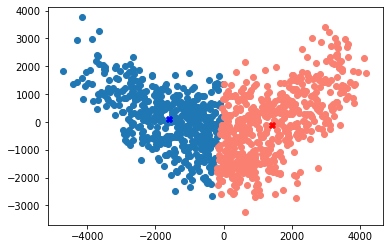

In [70]:
# find closest cluser
#NO NEED ANYMORE

clusters = get_cluster(centroids, pesticide)
cluster1 = transformed_pesticide[clusters[0]]
cluster2 = transformed_pesticide[clusters[1]]



plt.scatter(cluster1[:,0], cluster1[:,1])
plt.scatter(cluster2[:,0], cluster2[:,1], color = 'salmon')
plt.scatter(trasformed_centroids[0,0], trasformed_centroids[0,1], color = "blue", marker = "X")
plt.scatter(trasformed_centroids[1,0], trasformed_centroids[1,1], color = "red", marker = "X")